In [390]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [391]:
prices = pd.read_csv('data/prices.csv', index_col=0)
prices = prices.dropna()
prices.index = pd.to_datetime(prices.index, format='%Y%m%d')
prices.index.name = 'date'
prices.head()

,brn,cl,ho,xrb
date,,,,
2015-01-05,49.38,47.57,1.6967,1.3146
2015-01-12,49.91,48.80,1.6573,1.3580
2015-01-19,47.97,44.99,1.6435,1.3333
2015-01-26,52.10,46.88,1.6810,1.4550
2015-02-02,58.60,52.80,1.8420,1.5697


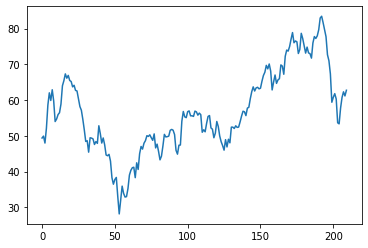

In [393]:
plt.plot(prices.brn.values)
plt.show()

In [394]:
dt = 1
T = prices.shape[0]
N = dt * T
x0 = prices.brn.values[0]
ts = np.arange(1, N + 1)

In [395]:
returns = (prices.brn.values[1:] - prices.brn.values[:-1]) / prices.brn.values[:-1]
returns[:5]

array([ 0.01073309, -0.03886997,  0.08609548,  0.12476008,  0.05853242])

In [396]:
mu = returns.mean()
mu

0.002238735446195556

In [397]:
sigma = returns.std()
sigma

0.04673530468067303

In [398]:
n_sim = 100

In [399]:
np.random.seed(1)
W_values = np.random.normal(size=(N, n_sim))
W_process = W_values.cumsum(axis=0)

In [401]:
drift = np.tile((mu - 0.5 * sigma**2) * ts, (n_sim, 1)).T
diffusion = sigma * W_process

In [402]:
X = x0 * np.exp(drift + diffusion)

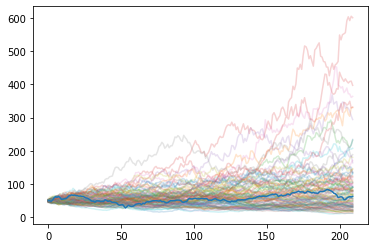

In [403]:
plt.plot(X, alpha=0.2)
plt.plot(prices.brn.values)
plt.show()

# Correlated

In [468]:
dt = 1
T = prices.shape[0]
N = dt * T
x0 = prices[['brn', 'cl']].iloc[0].values
ts = np.arange(1, N + 1)

In [469]:
returns = (prices[['brn', 'cl']].values[1:] - prices[['brn', 'cl']].values[:-1]) / prices[['brn', 'cl']].values[:-1]
returns[:5]

array([[ 0.01073309,  0.02585663],
       [-0.03886997, -0.07807377],
       [ 0.08609548,  0.04200934],
       [ 0.12476008,  0.12627986],
       [ 0.05853242,  0.01268939]])

In [470]:
mu = returns.mean(axis=0)
mu

array([0.00223874, 0.00182794])

In [471]:
sigma = returns.std(axis=0)
sigma

array([0.0467353 , 0.04740524])

In [472]:
corr = prices[['brn', 'cl']].corr().values
corr

array([[1.        , 0.98069769],
       [0.98069769, 1.        ]])

In [473]:
n_sim = 1

In [499]:
np.random.seed(5)
W_values = np.random.multivariate_normal(np.zeros(corr.shape[0]), corr, size=N)
W_process = W_values.cumsum(axis=0)

In [500]:
drift = (mu - 0.5 * sigma**2) * np.tile(ts, (corr.shape[0], 1)).T
diffusion = sigma * W_process

In [501]:
X = np.exp(drift + diffusion) * x0

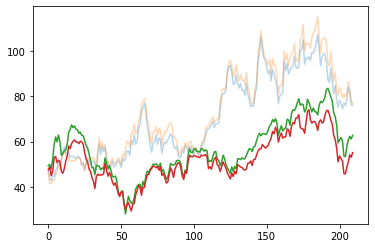

In [502]:
plt.plot(X, alpha = 0.3)
plt.plot(prices[['brn', 'cl']].values)
plt.show()